# Conceção e otimização de modelos de Machine Learning

### Dados
Neste trabalho, será usado o dataset <em>train.csv</em>

Este dataset contem casos 19 237 e 18 features, incluindo:

- Attributes
- ID
- Price: price of the care(Target Column)
- Levy
- Manufacturer
- Model
- Prod. year
- Category
- Leather interior
- Fuel type
- Engine volume
- Mileage
- Cylinders
- Gear box type
- Drive wheels
- Doors
- Wheel
- Color
- Airbags

## Importar Bibliotecas

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

## Ler Dados

In [185]:
#data = pd.read_csv('datasets/diabetes_binary_health_indicators_BRFSS2015.csv')
data = pd.read_csv('datasets/train.csv')

In [186]:
data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [187]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

## 1. Valores em Falta

In [189]:
data.drop(['ID'],axis=1,inplace=True)
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [190]:
data.drop(['Color'],axis=1,inplace=True)
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,4


In [191]:
data.duplicated().sum()

3522

In [192]:
data.drop_duplicates(inplace=True)
data.reset_index(drop=True,inplace=True)
data.duplicated().sum()

data

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15710,470,645,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325 km,4.0,Automatic,Front,04-May,Left wheel,12
15711,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,5
15712,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,8
15713,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,4


In [193]:
data['Levy'] = data['Levy'].replace('-', np.nan)

In [194]:
data.isnull().sum()

Price                  0
Levy                5677
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Airbags                0
dtype: int64

<Axes: >

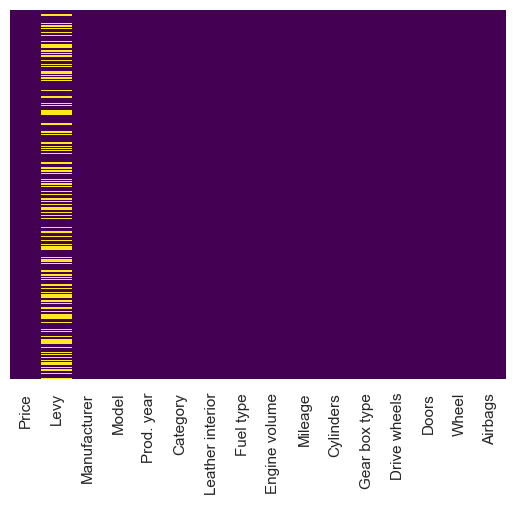

In [195]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Preencher ou eliminar valores em falta

In [196]:
data['Levy'].head()

0    1399
1    1018
2     NaN
3     862
4     446
Name: Levy, dtype: object

In [197]:
data[data['Levy'].isnull()]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags
2,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,2
9,26657,NaN,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,12
11,8781,NaN,FORD,Transit,1999,Microbus,No,CNG,4,0 km,8.0,Manual,Rear,02-Mar,Left wheel,0
12,3000,NaN,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000 km,4.0,Manual,Front,04-May,Left wheel,4
23,7840,NaN,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,230000 km,4.0,Manual,Front,02-Mar,Left wheel,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15705,8781,NaN,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,0 km,4.0,Automatic,Front,04-May,Left wheel,4
15706,19130,NaN,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800 km,4.0,Automatic,Front,04-May,Left wheel,12
15708,7840,NaN,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,220000 km,6.0,Tiptronic,Rear,04-May,Right-hand drive,0
15709,50,NaN,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.0,Automatic,Front,04-May,Left wheel,6


In [198]:
data['Levy'] = data['Levy'].replace( np.nan, -1)

In [199]:
data['Levy'].head()

0    1399
1    1018
2      -1
3     862
4     446
Name: Levy, dtype: object

In [200]:
data.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Airbags             0
dtype: int64

In [201]:
data.nunique()

Price               2315
Levy                 559
Manufacturer          65
Model               1590
Prod. year            54
Category              11
Leather interior       2
Fuel type              7
Engine volume        107
Mileage             7687
Cylinders             13
Gear box type          4
Drive wheels           3
Doors                  3
Wheel                  2
Airbags               17
dtype: int64

## 2. Tratamento de dados categóricos

In [202]:
print(data['Levy'].value_counts())

Levy
-1      5677
891      387
765      387
639      340
640      336
        ... 
2177       1
5666       1
3156       1
1719       1
1901       1
Name: count, Length: 559, dtype: int64


In [203]:
print(data['Levy'].value_counts().count())

559


In [204]:
print(data['Levy'].median())

639.0


In [205]:
data['Levy'] = data['Levy'].astype('float')
data['Levy'].std()

559.6833695652106

In [206]:
data['Levy'].mean()

561.2944957047407

In [207]:
data_r1 = data.copy()
data_r1['Levy'] = data_r1['Levy'].replace(-1, np.nan)

In [208]:
print("max -> " ,data['Levy'].max(), "| min -> ", data_r1['Levy'].min())

max ->  11714.0 | min ->  87.0


In [209]:
data.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,12
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,8
2,8467,-1.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,2
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,0
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,4


In [210]:
#'Desconhecido:-1','Muito Baixo:0', 'Baixo:1', 'Médio:2', 'Alto:3', 'Muito Alto:4'
labels = ['-1','0', '1', '2', '3', '4']

bins = [-2,0, 100, 550, 1000, 8000, 12000]

# Crie uma nova coluna 'Levy_Category' com as categorias
data['Levy'] = pd.cut(data['Levy'], bins=bins, labels=labels, right=False)

# Visualize as categorias
print(data['Levy'].value_counts())

Levy
2     5985
-1    5677
3     2780
1     1261
0        9
4        3
Name: count, dtype: int64


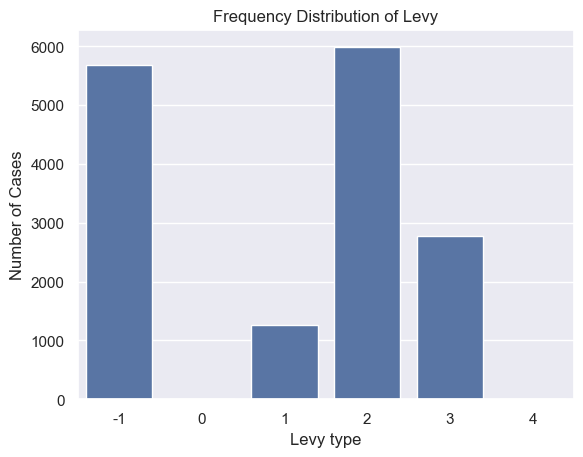

In [211]:
incidents_count = data['Levy'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=incidents_count.index, y=incidents_count.values)
plt.title('Frequency Distribution of Levy')
plt.ylabel('Number of Cases', fontsize=12)
plt.xlabel('Levy type', fontsize=12)
plt.show()

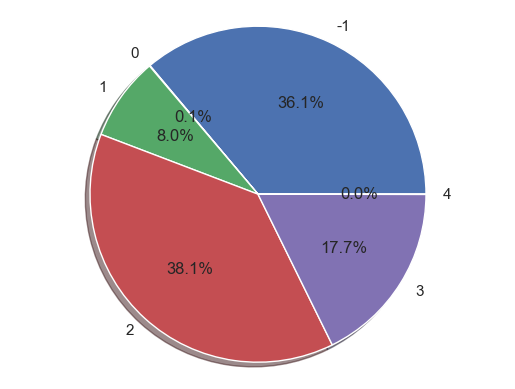

In [212]:
labels = data['Levy'].astype('category').cat.categories.tolist()
counts = data['Levy'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

In [213]:
data.Mileage = data.Mileage.map(lambda x: x.rstrip(' km'))
data.Mileage = data.Mileage.astype('float')
#data['Mileage'] = data['Mileage'].str.replace(' km', '')
print(data['Mileage'].median())
print("max -> " ,data['Mileage'].max(), "| min -> ", data['Mileage'].min())

121000.0
max ->  2147483647.0 | min ->  0.0


In [214]:
#'Novo :0', 'Poucos Km's:1', 'Medio Km's:2', 'Muitos km's :3', 'Muitos Muitos Km's:4'
labels = ['0', '1', '2', '3', '4']

bins = [ 0, 65000, 130000, 200000,500000, 10000000000000]

# Crie uma nova coluna 'Levy_Category' com as categorias
data['Mileage'] = pd.cut(data['Mileage'], bins=bins, labels=labels, right=False)

# Visualize as categorias
print(data['Mileage'].value_counts())

Mileage
1    4706
2    4138
0    3796
3    2856
4     219
Name: count, dtype: int64


In [215]:
data

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags
0,13328,3,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,2,6.0,Automatic,4x4,04-May,Left wheel,12
1,16621,3,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,2,6.0,Tiptronic,4x4,04-May,Left wheel,8
2,8467,-1,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,3,4.0,Variator,Front,04-May,Right-hand drive,2
3,3607,2,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,2,4.0,Automatic,4x4,04-May,Left wheel,0
4,11726,1,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,1,4.0,Automatic,Front,04-May,Left wheel,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15710,470,2,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,3,4.0,Automatic,Front,04-May,Left wheel,12
15711,8467,-1,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,3,4.0,Manual,Rear,02-Mar,Left wheel,5
15712,15681,2,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,2,4.0,Tiptronic,Front,04-May,Left wheel,8
15713,26108,2,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,1,4.0,Automatic,Front,04-May,Left wheel,4


In [216]:
data['Leather interior'].value_counts()

Leather interior
Yes    10556
No      5159
Name: count, dtype: int64

In [217]:
data['Leather interior'] = data['Leather interior'].map({'Yes': 1, 'No': 0})

In [218]:
data['Leather interior'].value_counts()

Leather interior
1    10556
0     5159
Name: count, dtype: int64

In [219]:
data['Doors'].value_counts()

Doors
04-May    14845
02-Mar      746
>5          124
Name: count, dtype: int64

In [220]:
data['Doors'] = data['Doors'].map({'04-May': 4, '02-Mar': 2, '>5': 5})
data['Doors'].value_counts()

Doors
4    14845
2      746
5      124
Name: count, dtype: int64

In [221]:
data['Engine volume'].value_counts()

Engine volume
2            3313
2.5          1653
1.8          1538
1.5          1232
1.6          1221
             ... 
7.3             1
0.2 Turbo       1
6.8             1
6.7             1
1.1 Turbo       1
Name: count, Length: 107, dtype: int64

In [222]:
data['Turbo'] = data['Engine volume'].str.contains('Turbo', regex=False)
data['Turbo'] = data['Turbo'].map({True: 1, False: 0})
data['Turbo'].value_counts()

Turbo
0    13826
1     1889
Name: count, dtype: int64

In [223]:
data['Engine volume'] = data['Engine volume'].map(lambda x: x.rstrip('Turbo'))
data['Engine volume'] = data['Engine volume'].astype('float')
data['Engine volume'].value_counts()

Engine volume
2.0    3716
2.5    1744
1.8    1713
1.6    1337
1.5    1297
       ... 
0.5       1
7.3       1
3.1       1
5.2       1
5.8       1
Name: count, Length: 65, dtype: int64

In [224]:
data['Fuel type'] = data['Fuel type'].map({'Petrol': 0, 'Diesel': 1, 'Hybrid': 2, 'CNG': 3, 'Plug-in Hybrid': 4, 'LPG': 5, 'Hydrogen': 6})

data['Fuel type'].value_counts()

Fuel type
0    8815
1    3209
2    2423
5     714
3     468
4      85
6       1
Name: count, dtype: int64

In [225]:
data['Gear box type'] = data['Gear box type'].map({'Automatic': 0, 'Tiptronic': 1, 'Variator': 2, 'Manual': 3})

data['Gear box type'].value_counts()

Gear box type
0    10079
1     3064
3     1841
2      731
Name: count, dtype: int64

In [226]:
data['Drive wheels'] = data['Drive wheels'].map({'Front': 0, 'Rear': 1, '4x4': 2})

data['Drive wheels'].value_counts()

Drive wheels
0    10980
2     2766
1     1969
Name: count, dtype: int64

In [227]:
data['Wheel'] = data['Wheel'].map({'Left wheel': 0, 'Right-hand drive': 1})

data['Wheel'].value_counts()

Wheel
0    14291
1     1424
Name: count, dtype: int64

In [228]:
data['Cylinders'].value_counts()

Cylinders
4.0     12270
6.0      2428
8.0       605
5.0       165
3.0       107
2.0        42
12.0       38
1.0        37
10.0       12
16.0        5
7.0         4
9.0         1
14.0        1
Name: count, dtype: int64

In [229]:
lb = LabelEncoder()

CategoryLe = lb.fit(data['Category'])

data['Category'] = CategoryLe.transform(data['Category'])

data['Category'].value_counts()

Category
9     7008
4     4225
3     2540
7      534
1      476
10     311
6      295
2      229
8       51
0       35
5       11
Name: count, dtype: int64

In [230]:
ManufacturerLe = lb.fit(data['Manufacturer'])

data['Manufacturer'] = ManufacturerLe.transform(data['Manufacturer'])

data['Manufacturer'].value_counts()

Manufacturer
23    3050
58    2862
36    1451
8      968
16     956
      ... 
57       1
44       1
50       1
2        1
19       1
Name: count, Length: 65, dtype: int64

In [231]:
ModelLe = lb.fit(data['Model'])

data['Model'] = ModelLe.transform(data['Model'])

data['Model'].value_counts()

Model
1154    946
1334    821
633     720
435     581
1305    486
       ... 
18        1
611       1
340       1
1132      1
1169      1
Name: count, Length: 1590, dtype: int64

In [232]:
data

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Airbags,Turbo
0,13328,3,32,1242,2010,4,1,2,3.5,2,6.0,0,2,4,0,12,0
1,16621,3,8,658,2011,4,0,0,3.0,2,6.0,1,2,4,0,8,0
2,8467,-1,21,684,2006,3,0,0,1.3,3,4.0,2,0,4,1,2,0
3,3607,2,16,661,2011,4,1,2,2.5,2,4.0,0,2,4,0,0,0
4,11726,1,21,684,2014,3,1,0,1.3,1,4.0,0,0,4,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15710,470,2,58,1154,2011,3,1,2,1.8,3,4.0,0,0,4,0,12,0
15711,8467,-1,36,385,1999,1,1,3,2.0,3,4.0,3,1,2,0,5,1
15712,15681,2,23,1334,2011,9,1,0,2.4,2,4.0,1,0,4,0,8,0
15713,26108,2,23,1442,2010,4,1,1,2.0,1,4.0,0,0,4,0,4,0


<Axes: >

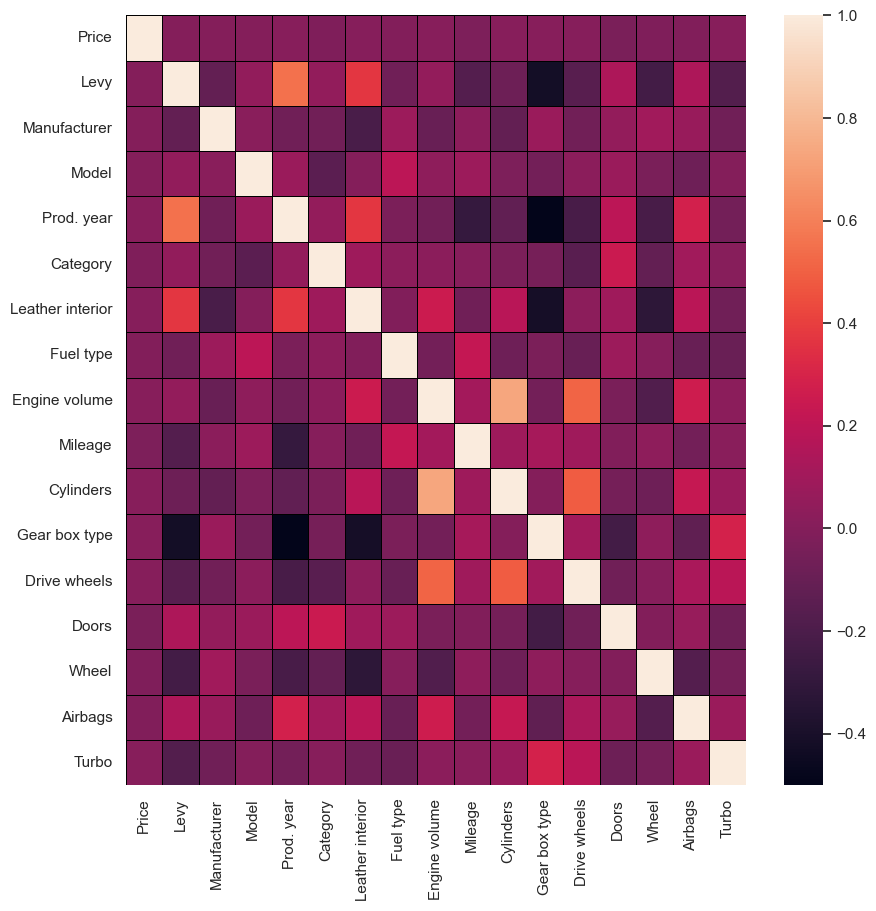

In [234]:
fig = plt.figure(figsize=(10,10))
corr = data.corr(method='pearson')
sns.heatmap(corr, linecolor='black', linewidths=0.5)

C:\Users\edini22\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


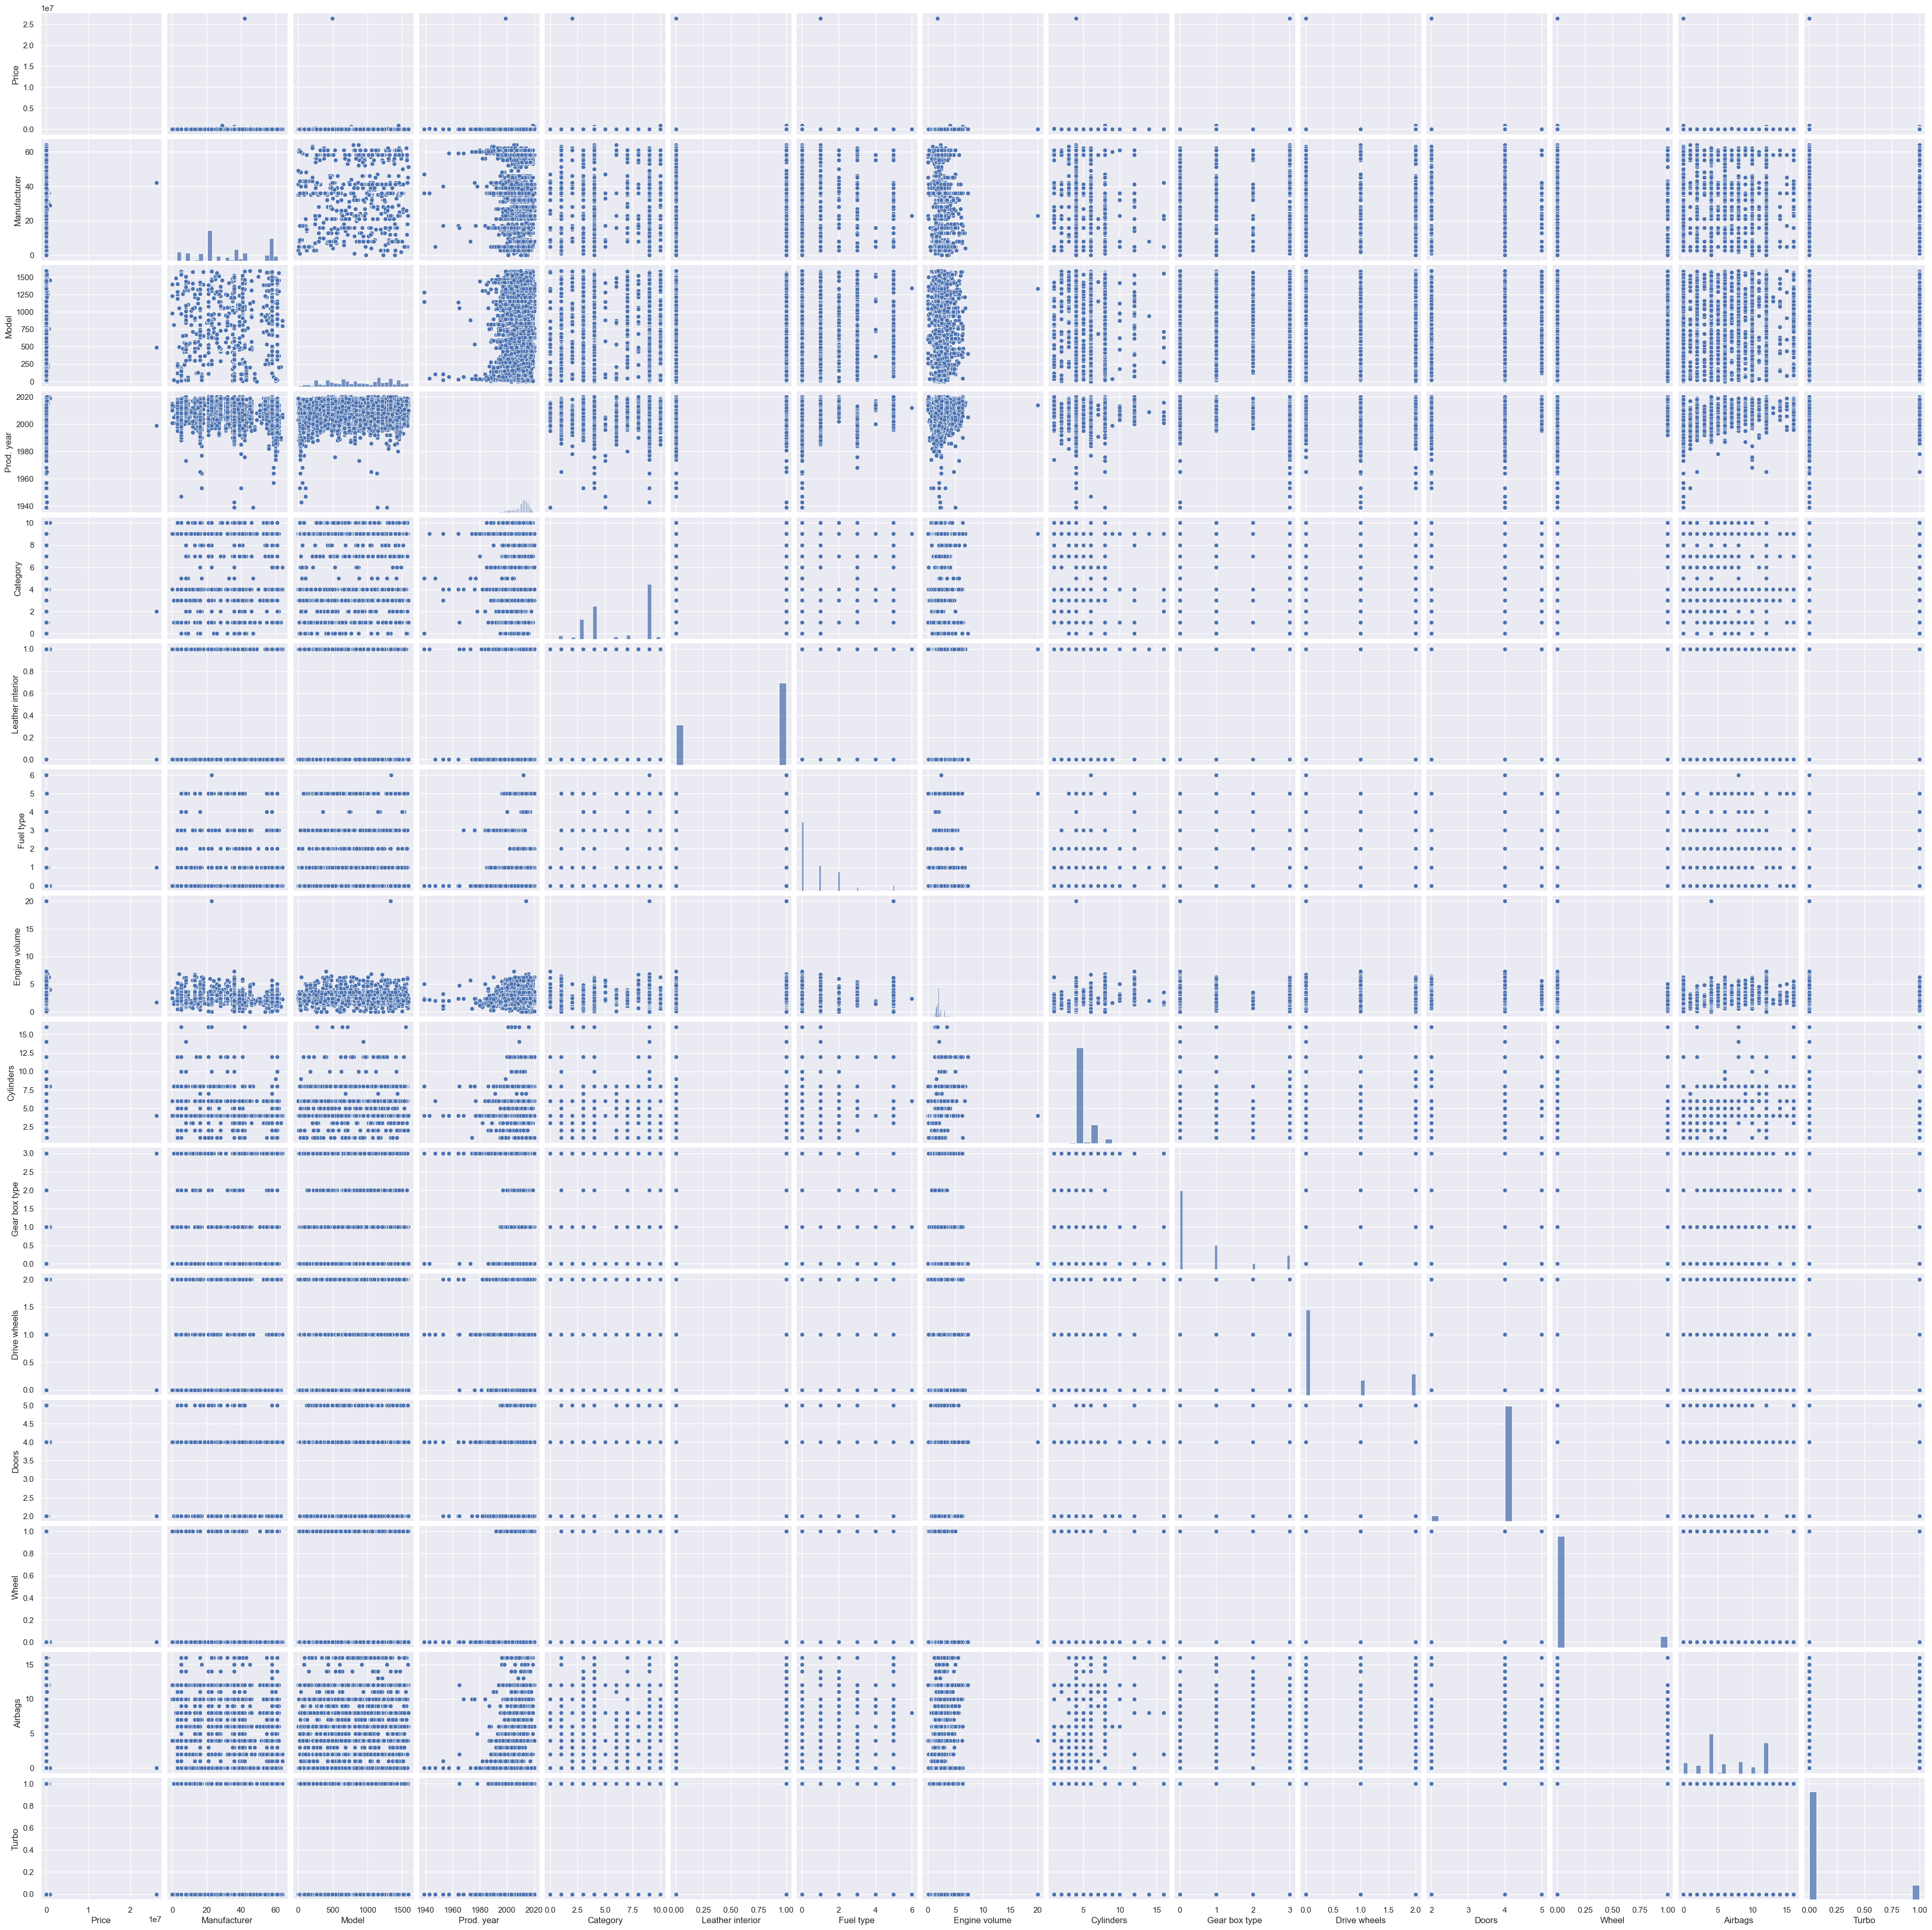

In [235]:
sns.pairplot(data)

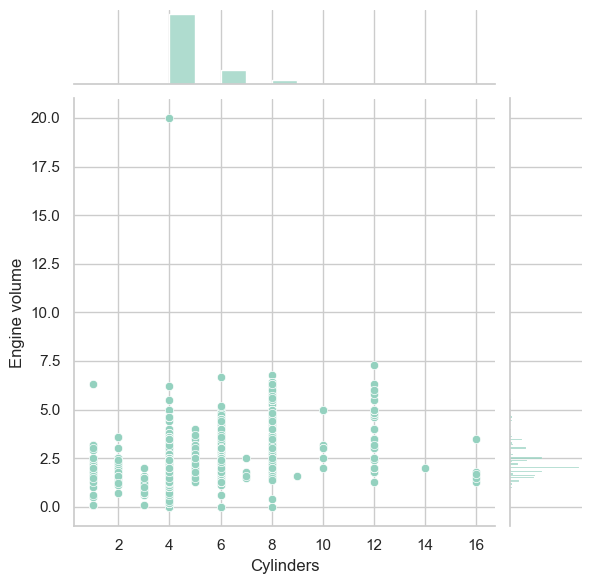

In [236]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='Cylinders',y='Engine volume',data=data)

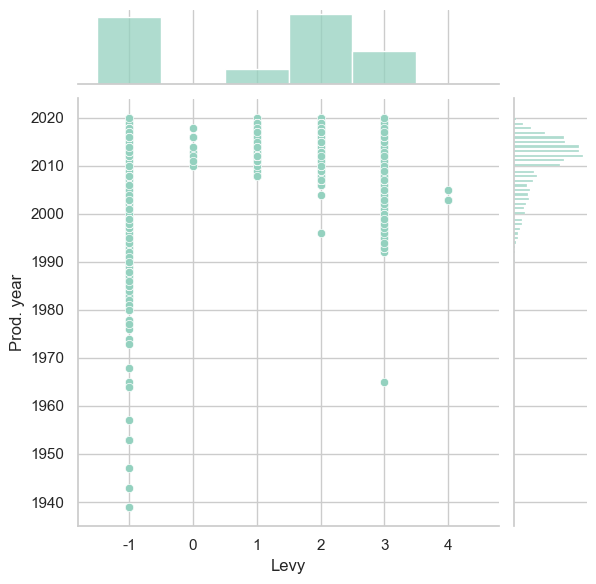

In [238]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')
sns.jointplot(x='Levy',y='Prod. year',data=data)

In [239]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15715 entries, 0 to 15714
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             15715 non-null  int64   
 1   Levy              15715 non-null  category
 2   Manufacturer      15715 non-null  int32   
 3   Model             15715 non-null  int32   
 4   Prod. year        15715 non-null  int64   
 5   Category          15715 non-null  int32   
 6   Leather interior  15715 non-null  int64   
 7   Fuel type         15715 non-null  int64   
 8   Engine volume     15715 non-null  float64 
 9   Mileage           15715 non-null  category
 10  Cylinders         15715 non-null  float64 
 11  Gear box type     15715 non-null  int64   
 12  Drive wheels      15715 non-null  int64   
 13  Doors             15715 non-null  int64   
 14  Wheel             15715 non-null  int64   
 15  Airbags           15715 non-null  int64   
 16  Turbo             1571